# 1-Read the data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
from datetime import datetime, timedelta, date

In [7]:
df= pd.read_csv('online_retail_II.csv')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## understanding the dataset

In [11]:
df.shape[0]

1067371

In [13]:
df.shape[1]

8

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [19]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [21]:
def drop_columns(df, columns):
    df1= df.drop(columns, axis=1)
    return df1

In [23]:
df1= drop_columns(df, ["Description", "Country"])

In [25]:
df1

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0
...,...,...,...,...,...,...
1067366,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0
1067367,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0
1067368,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0
1067369,581587,22138,3,2011-12-09 12:50:00,4.95,12680.0


In [27]:
df1.isnull().sum()

Invoice             0
StockCode           0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
dtype: int64

In [29]:
df1

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0
...,...,...,...,...,...,...
1067366,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0
1067367,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0
1067368,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0
1067369,581587,22138,3,2011-12-09 12:50:00,4.95,12680.0


In [31]:
#Let's drop the rows containing NaN
df1.dropna(inplace=True)

In [33]:
df1[df1.duplicated()]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
371,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0
383,489517,22130,6,2009-12-01 11:34:00,0.85,16329.0
384,489517,22319,12,2009-12-01 11:34:00,0.65,16329.0
385,489517,21913,1,2009-12-01 11:34:00,3.75,16329.0
386,489517,21821,1,2009-12-01 11:34:00,3.75,16329.0
...,...,...,...,...,...,...
1067136,581538,22068,1,2011-12-09 11:34:00,0.39,14446.0
1067150,581538,23318,1,2011-12-09 11:34:00,2.49,14446.0
1067153,581538,22992,1,2011-12-09 11:34:00,1.95,14446.0
1067160,581538,22694,1,2011-12-09 11:34:00,2.10,14446.0


In [35]:
df1.loc[(df1.Invoice=="489517") & (df1.StockCode=="21912")]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
363,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0
371,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0
394,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0


In [37]:
len(df1[df1.duplicated()])

26481

In [39]:
df1.drop(df1[df1.duplicated()].index, axis=0, inplace=True)

In [41]:
df1.shape

(797883, 6)

In [43]:
# now, no "NULL" and "duplicate" data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797883 entries, 0 to 1067370
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797883 non-null  object 
 1   StockCode    797883 non-null  object 
 2   Quantity     797883 non-null  int64  
 3   InvoiceDate  797883 non-null  object 
 4   Price        797883 non-null  float64
 5   Customer ID  797883 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 42.6+ MB


In [45]:
df1.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0


## Handling columns

In [48]:
df2= df1.copy()
df2["TotalPrice"] = df2["Quantity"] * df2["Price"]

In [50]:
for i in df2.columns:
    print(i, "column, unique values: ", df2[i].unique())
    print("************")
    print("")

Invoice column, unique values:  ['489434' '489435' '489436' ... '581585' '581586' '581587']
************

StockCode column, unique values:  ['85048' '79323P' '79323W' ... '23562' '23561' '23843']
************

Quantity column, unique values:  [    12     48     24     10     18      3     16      4      2      6
      8      1     28     30     60     32     56      9     25     36
     20    -12     -6     -4    -24     -3     -2    576    288     27
     64    160      5     -1     72     50     54      7    800     11
     58    192     96    144    100    180    216     15    240    108
     33     90     81    -81    -48     17     -5     40     -8     -9
     13     21    120    200    168     19    280    128   -150    -18
    -23     80    300    450     14     61    480     -7     46    504
     45   4320   5184   4008     22    600    505    500     23     47
    432    252     75    -16   -504   -600   -252   -246    -36    360
    107     49     42     66    -10     34     

In [52]:
for i in df2.columns:
    print(i, "column, unique values: ", df2[i].nunique())
    print("************")
    print("")

Invoice column, unique values:  44876
************

StockCode column, unique values:  4646
************

Quantity column, unique values:  643
************

InvoiceDate column, unique values:  41439
************

Price column, unique values:  1022
************

Customer ID column, unique values:  5942
************

TotalPrice column, unique values:  5625
************



In [54]:
df2.shape

(797883, 7)

In [56]:
df2.loc[(df2["Quantity"]<=0) | (df2["Price"]<=0)]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
178,C489449,22087,-12,2009-12-01 10:33:00,2.95,16321.0,-35.40
179,C489449,85206A,-6,2009-12-01 10:33:00,1.65,16321.0,-9.90
180,C489449,21895,-4,2009-12-01 10:33:00,4.25,16321.0,-17.00
181,C489449,21896,-6,2009-12-01 10:33:00,2.10,16321.0,-12.60
182,C489449,22083,-12,2009-12-01 10:33:00,2.95,16321.0,-35.40
...,...,...,...,...,...,...,...
1065910,C581490,23144,-11,2011-12-09 09:57:00,0.83,14397.0,-9.13
1067002,C581499,M,-1,2011-12-09 10:28:00,224.69,15498.0,-224.69
1067176,C581568,21258,-5,2011-12-09 11:57:00,10.95,15311.0,-54.75
1067177,C581569,84978,-1,2011-12-09 11:58:00,1.25,17315.0,-1.25


In [58]:
df3= df2[(df2['Price'] > 0)]

In [60]:
df3= df3[(df3['Quantity'] > 0)]

In [62]:
df2.shape

(797883, 7)

In [64]:
df3.shape

(779423, 7)

In [66]:
df3.loc[(df3["Quantity"]<=0) | (df3["Price"]<=0)]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice


In [68]:
#Let's find the non-numeric stock codes:
# ALL ONLY non-numeric stock codes
wrong_stock_codes= df3[df3["StockCode"].astype(str).str.contains(r"^[a-zA-Z''-'\s]{1,40}$")]["StockCode"].unique().tolist()

df3[df3["StockCode"].isin(wrong_stock_codes)].groupby(["StockCode"]).agg({"StockCode": "count"})

,StockCode
StockCode,
ADJUST,32
BANK CHARGES,31
D,5
DOT,16
M,681
PADS,17
POST,1803


In [70]:
df3[df3["StockCode"].isin(wrong_stock_codes)].groupby(["StockCode"]).agg({"StockCode": "count"}).sum()

StockCode    2585
dtype: int64

In [72]:
#drop them
df3= df3[~df3["StockCode"].isin(wrong_stock_codes)].reset_index(drop=True)

In [74]:
# Other non-numeric stock codes
wrong_stock_codes2= df3[df3["StockCode"].astype(str).str.contains(r"[a-zA-Z]{3,}")]["StockCode"].unique().tolist()
df3[df3["StockCode"].isin(wrong_stock_codes2)].groupby(["StockCode"]).agg({"StockCode": "count"})

,StockCode
StockCode,
ADJUST2,3
TEST001,9
TEST002,1


In [76]:
df3[df3["StockCode"].isin(wrong_stock_codes2)].groupby(["StockCode"]).agg({"StockCode": "count"}).sum()

StockCode    13
dtype: int64

In [78]:
#drop
df3= df3[~df3["StockCode"].isin(wrong_stock_codes2)].reset_index(drop=True)

In [80]:
df3

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,83.40
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,81.00
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,81.00
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,100.80
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,30.00
...,...,...,...,...,...,...,...
776820,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,10.20
776821,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,12.60
776822,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,16.60
776823,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,16.60


In [82]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776825 entries, 0 to 776824
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      776825 non-null  object 
 1   StockCode    776825 non-null  object 
 2   Quantity     776825 non-null  int64  
 3   InvoiceDate  776825 non-null  object 
 4   Price        776825 non-null  float64
 5   Customer ID  776825 non-null  float64
 6   TotalPrice   776825 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 41.5+ MB


In [84]:
# convert the type of column "InvoiceDate" to pandas datetime
df3.InvoiceDate = pd.to_datetime(df3.InvoiceDate)

In [86]:
# convert the "Customer ID" column to a categorical column:
df3["Customer ID"]= df3["Customer ID"].astype('object')

In [88]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776825 entries, 0 to 776824
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      776825 non-null  object        
 1   StockCode    776825 non-null  object        
 2   Quantity     776825 non-null  int64         
 3   InvoiceDate  776825 non-null  datetime64[ns]
 4   Price        776825 non-null  float64       
 5   Customer ID  776825 non-null  object        
 6   TotalPrice   776825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 41.5+ MB


## Life Time value prediction

In [91]:
df_LTV= df3.copy()

In [93]:
print("First date in dataset: ", df_LTV['InvoiceDate'].min())

First date in dataset:  2009-12-01 07:45:00


In [95]:
print("Last date in dataset: ", df_LTV['InvoiceDate'].max())

Last date in dataset:  2011-12-09 12:50:00


### create 2 dataframes:

In [98]:
df_last= df_LTV[(df_LTV.InvoiceDate >=  datetime.strptime("2010-8-1", '%Y-%m-%d')) & (df_LTV.InvoiceDate <= df_LTV['InvoiceDate'].max())].reset_index(drop=True)

In [100]:
df_first= df_LTV[(df_LTV.InvoiceDate <  datetime.strptime("2010-8-1", '%Y-%m-%d')) & (df_LTV.InvoiceDate >= df_LTV['InvoiceDate'].min())].reset_index(drop=True)

In [102]:
df_last

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
0,517707,22066,2,2010-08-01 10:06:00,1.45,12843.0,2.90
1,517707,21889,1,2010-08-01 10:06:00,1.25,12843.0,1.25
2,517708,22415,2,2010-08-01 10:09:00,7.95,17243.0,15.90
3,517708,22470,4,2010-08-01 10:09:00,2.95,17243.0,11.80
4,517708,22483,2,2010-08-01 10:09:00,2.95,17243.0,5.90
...,...,...,...,...,...,...,...
558575,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,10.20
558576,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,12.60
558577,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,16.60
558578,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,16.60


In [104]:
df_first

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,83.40
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,81.00
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,81.00
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,100.80
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,30.00
...,...,...,...,...,...,...,...
218240,517704,22659,6,2010-07-30 17:08:00,1.95,14031.0,11.70
218241,517704,21658,3,2010-07-30 17:08:00,3.95,14031.0,11.85
218242,517704,22328,8,2010-07-30 17:08:00,2.95,14031.0,23.60
218243,517704,37370,72,2010-07-30 17:08:00,1.06,14031.0,76.32


In [106]:
RFM_df= pd.DataFrame(df_first['Customer ID'].unique())
RFM_df.columns = ['Customer ID']
RFM_df

,Customer ID
0,13085.0
1,13078.0
2,15362.0
3,18102.0
4,12682.0
...,...
3132,14346.0
3133,16428.0
3134,17109.0
3135,17735.0


In [108]:
#for Recency:
recency_df= df_first.groupby('Customer ID')['InvoiceDate'].max().reset_index()
recency_df

,Customer ID,InvoiceDate
0,12346.0,2010-06-28 13:53:00
1,12349.0,2010-04-29 13:20:00
2,12355.0,2010-05-21 11:59:00
3,12358.0,2010-06-07 12:28:00
4,12359.0,2010-06-22 10:24:00
...,...,...
3132,18281.0,2010-05-11 10:49:00
3133,18283.0,2010-03-28 13:21:00
3134,18285.0,2010-02-17 10:24:00
3135,18286.0,2009-12-16 10:45:00


In [110]:
last_day_df_first= df_first['InvoiceDate'].max()
last_day_df_first

Timestamp('2010-07-30 17:08:00')

In [112]:
recency_df['Recency']= recency_df['InvoiceDate'].apply(lambda x: (last_day_df_first - x).days)
recency_df

,Customer ID,InvoiceDate,Recency
0,12346.0,2010-06-28 13:53:00,32
1,12349.0,2010-04-29 13:20:00,92
2,12355.0,2010-05-21 11:59:00,70
3,12358.0,2010-06-07 12:28:00,53
4,12359.0,2010-06-22 10:24:00,38
...,...,...,...
3132,18281.0,2010-05-11 10:49:00,80
3133,18283.0,2010-03-28 13:21:00,124
3134,18285.0,2010-02-17 10:24:00,163
3135,18286.0,2009-12-16 10:45:00,226


In [114]:
RFM_df= pd.merge(RFM_df, recency_df[['Customer ID','Recency']], on='Customer ID')
RFM_df

,Customer ID,Recency
0,13085.0,182
1,13078.0,3
2,15362.0,241
3,18102.0,0
4,12682.0,15
...,...,...
3132,14346.0,0
3133,16428.0,0
3134,17109.0,0
3135,17735.0,0


In [116]:
#order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

### Build 4 clusters for recency and add it to dataframe:

In [119]:
from sklearn.cluster import KMeans

In [121]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Recency']])
RFM_df['RecencyCluster'] = kmeans.predict(RFM_df[['Recency']])
RFM_df

,Customer ID,Recency,RecencyCluster
0,13085.0,182,3
1,13078.0,3,0
2,15362.0,241,3
3,18102.0,0,0
4,12682.0,15,0
...,...,...,...
3132,14346.0,0,0
3133,16428.0,0,0
3134,17109.0,0,0
3135,17735.0,0,0


In [123]:
RFM_df= order_cluster('RecencyCluster', 'Recency', RFM_df, False)
RFM_df


,Customer ID,Recency,RecencyCluster
0,13085.0,182,0
1,13078.0,3,3
2,15362.0,241,0
3,18102.0,0,3
4,12682.0,15,3
...,...,...,...
3132,14346.0,0,3
3133,16428.0,0,3
3134,17109.0,0,3
3135,17735.0,0,3


In [125]:
RecencyCluster_Stats = RFM_df.groupby("RecencyCluster")["Recency"].describe()
RecencyCluster_Stats

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,336.0,213.937500,22.769034,177.0,190.00,226.0,234.0,241.0
1,573.0,138.233857,18.923228,107.0,123.00,136.0,152.0,176.0
2,922.0,73.824295,17.400049,47.0,57.25,73.0,88.5,106.0
3,1306.0,19.693721,13.966339,0.0,7.00,18.0,31.0,46.0


In [127]:
#for Frequency:
frequency_df= df_first.groupby(["Customer ID"]).agg({"Invoice":"nunique"}).reset_index()
frequency_df.rename(columns={"Invoice":"Frequency"}, inplace=True)
frequency_df

,Customer ID,Frequency
0,12346.0,2
1,12349.0,1
2,12355.0,1
3,12358.0,2
4,12359.0,5
...,...,...
3132,18281.0,1
3133,18283.0,3
3134,18285.0,1
3135,18286.0,1


In [129]:
RFM_df= pd.merge(RFM_df, frequency_df, on='Customer ID')
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency
0,13085.0,182,0,6
1,13078.0,3,3,20
2,15362.0,241,0,1
3,18102.0,0,3,61
4,12682.0,15,3,14
...,...,...,...,...
3132,14346.0,0,3,1
3133,16428.0,0,3,2
3134,17109.0,0,3,1
3135,17735.0,0,3,1


In [131]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Frequency']])
RFM_df['FrequencyCluster'] = kmeans.predict(RFM_df[['Frequency']])
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13085.0,182,0,6,2
1,13078.0,3,3,20,1
2,15362.0,241,0,1,0
3,18102.0,0,3,61,3
4,12682.0,15,3,14,2
...,...,...,...,...,...
3132,14346.0,0,3,1,0
3133,16428.0,0,3,2,0
3134,17109.0,0,3,1,0
3135,17735.0,0,3,1,0


In [133]:
RFM_df= order_cluster('FrequencyCluster', 'Frequency', RFM_df, True)
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13085.0,182,0,6,1
1,13078.0,3,3,20,2
2,15362.0,241,0,1,0
3,18102.0,0,3,61,3
4,12682.0,15,3,14,1
...,...,...,...,...,...
3132,14346.0,0,3,1,0
3133,16428.0,0,3,2,0
3134,17109.0,0,3,1,0
3135,17735.0,0,3,1,0


In [135]:
FrequencyCluster_Stats= RFM_df.groupby("FrequencyCluster")["Frequency"].describe()
FrequencyCluster_Stats

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,2546.0,1.844855,1.012247,1.0,1.00,1.0,2.0,4.0
1,518.0,7.200772,2.358211,5.0,5.00,6.5,8.0,14.0
2,59.0,21.796610,7.041208,15.0,17.00,19.0,25.5,41.0
3,14.0,62.000000,14.245107,46.0,51.75,58.5,74.0,88.0


In [137]:
#for Monetary:
monetary_df= df_first.groupby('Customer ID')['TotalPrice'].sum().reset_index()
monetary_df.columns = ['Customer ID', 'Monetary']
monetary_df.head()

,Customer ID,Monetary
0,12346.0,169.36
1,12349.0,1068.52
2,12355.0,488.21
3,12358.0,1697.93
4,12359.0,2012.03


In [139]:
RFM_df= pd.merge(RFM_df, monetary_df, on='Customer ID')
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary
0,13085.0,182,0,6,1,2017.20
1,13078.0,3,3,20,2,9560.24
2,15362.0,241,0,1,0,310.75
3,18102.0,0,3,61,3,222525.28
4,12682.0,15,3,14,1,6845.16
...,...,...,...,...,...,...
3132,14346.0,0,3,1,0,672.93
3133,16428.0,0,3,2,0,418.01
3134,17109.0,0,3,1,0,184.69
3135,17735.0,0,3,1,0,271.02


In [141]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Monetary']])
RFM_df['MonetaryCluster']= kmeans.predict(RFM_df[['Monetary']])
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,13085.0,182,0,6,1,2017.20,0
1,13078.0,3,3,20,2,9560.24,3
2,15362.0,241,0,1,0,310.75,0
3,18102.0,0,3,61,3,222525.28,1
4,12682.0,15,3,14,1,6845.16,3
...,...,...,...,...,...,...,...
3132,14346.0,0,3,1,0,672.93,0
3133,16428.0,0,3,2,0,418.01,0
3134,17109.0,0,3,1,0,184.69,0
3135,17735.0,0,3,1,0,271.02,0


In [143]:
RFM_df= order_cluster('MonetaryCluster', 'Monetary', RFM_df, True)
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,13085.0,182,0,6,1,2017.20,0
1,13078.0,3,3,20,2,9560.24,1
2,15362.0,241,0,1,0,310.75,0
3,18102.0,0,3,61,3,222525.28,3
4,12682.0,15,3,14,1,6845.16,1
...,...,...,...,...,...,...,...
3132,14346.0,0,3,1,0,672.93,0
3133,16428.0,0,3,2,0,418.01,0
3134,17109.0,0,3,1,0,184.69,0
3135,17735.0,0,3,1,0,271.02,0


In [145]:
MonetaryCluster_Stats= RFM_df.groupby("MonetaryCluster")["Monetary"].describe()
MonetaryCluster_Stats

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,3014.0,883.904728,945.018267,1.55,247.6800,528.715,1186.9925,5289.88
1,108.0,9841.334722,4690.645381,5388.00,6448.9275,8073.605,10899.4650,24036.87
2,11.0,40145.643636,12041.149029,28405.08,31173.5400,36066.050,45254.6300,69700.34
3,4.0,149476.032500,50428.826578,106707.71,126195.0350,134335.570,157616.5675,222525.28


In [ ]:
# calculate Overall Scores:

# 0 to 2: Low Value
# 3 to 4: Mid Value
# 5+: High Value


In [147]:
#overall scoring
RFM_df['OverallScore'] = RFM_df['RecencyCluster'] + RFM_df['FrequencyCluster'] + RFM_df['MonetaryCluster']
RFM_df['Segment'] = 'Low-Value'
RFM_df.loc[RFM_df['OverallScore']>2,'Segment'] = 'Mid-Value' 
RFM_df.loc[RFM_df['OverallScore']>4,'Segment'] = 'High-Value'
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment
0,13085.0,182,0,6,1,2017.20,0,1,Low-Value
1,13078.0,3,3,20,2,9560.24,1,6,High-Value
2,15362.0,241,0,1,0,310.75,0,0,Low-Value
3,18102.0,0,3,61,3,222525.28,3,9,High-Value
4,12682.0,15,3,14,1,6845.16,1,5,High-Value
...,...,...,...,...,...,...,...,...,...
3132,14346.0,0,3,1,0,672.93,0,3,Mid-Value
3133,16428.0,0,3,2,0,418.01,0,3,Mid-Value
3134,17109.0,0,3,1,0,184.69,0,3,Mid-Value
3135,17735.0,0,3,1,0,271.02,0,3,Mid-Value


In [154]:
monetary_df_last= df_last.groupby('Customer ID')['TotalPrice'].sum().reset_index()
monetary_df_last.columns = ['Customer ID', 'lastMonthsMonetary']
monetary_df_last['Customer ID']= monetary_df_last['Customer ID'].astype("object")
monetary_df_last.head()

,Customer ID,lastMonthsMonetary
0,12346.0,77183.60
1,12347.0,4921.53
2,12348.0,1658.40
3,12349.0,2610.17
4,12350.0,294.40


In [156]:
monetary_df_last= monetary_df_last[monetary_df_last["lastMonthsMonetary"] <= monetary_df_last["lastMonthsMonetary"].quantile(0.99)]

In [158]:
monetary_df_last.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5105 entries, 1 to 5156
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         5105 non-null   object 
 1   lastMonthsMonetary  5105 non-null   float64
dtypes: float64(1), object(1)
memory usage: 119.6+ KB


In [160]:
# merge our 8 months and 16 months dataframes:
RFM_df_NEW = pd.merge(RFM_df, monetary_df_last, on='Customer ID', how='left')
RFM_df_NEW = RFM_df_NEW.fillna(0)
RFM_df_NEW['Customer ID']= RFM_df_NEW['Customer ID'].astype("object")
RFM_df_NEW

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary
0,13085.0,182,0,6,1,2017.20,0,1,Low-Value,416.08
1,13078.0,3,3,20,2,9560.24,1,6,High-Value,19457.82
2,15362.0,241,0,1,0,310.75,0,0,Low-Value,302.33
3,18102.0,0,3,61,3,222525.28,3,9,High-Value,0.00
4,12682.0,15,3,14,1,6845.16,1,5,High-Value,13891.06
...,...,...,...,...,...,...,...,...,...,...
3132,14346.0,0,3,1,0,672.93,0,3,Mid-Value,1642.82
3133,16428.0,0,3,2,0,418.01,0,3,Mid-Value,220.48
3134,17109.0,0,3,1,0,184.69,0,3,Mid-Value,1107.02
3135,17735.0,0,3,1,0,271.02,0,3,Mid-Value,16519.31


In [162]:
RFM_df_NEW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         3137 non-null   object 
 1   Recency             3137 non-null   int64  
 2   RecencyCluster      3137 non-null   int64  
 3   Frequency           3137 non-null   int64  
 4   FrequencyCluster    3137 non-null   int64  
 5   Monetary            3137 non-null   float64
 6   MonetaryCluster     3137 non-null   int64  
 7   OverallScore        3137 non-null   int64  
 8   Segment             3137 non-null   object 
 9   lastMonthsMonetary  3137 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 245.2+ KB


In [164]:
#creating 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(RFM_df_NEW[['lastMonthsMonetary']])
RFM_df_NEW['LTVCluster'] = kmeans.predict(RFM_df_NEW[['lastMonthsMonetary']])

In [166]:
RFM_df_NEW = order_cluster('LTVCluster', 'lastMonthsMonetary', RFM_df_NEW, True)
RFM_df_NEW

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary,LTVCluster
0,13085.0,182,0,6,1,2017.20,0,1,Low-Value,416.08,0
1,13078.0,3,3,20,2,9560.24,1,6,High-Value,19457.82,2
2,15362.0,241,0,1,0,310.75,0,0,Low-Value,302.33,0
3,18102.0,0,3,61,3,222525.28,3,9,High-Value,0.00,0
4,12682.0,15,3,14,1,6845.16,1,5,High-Value,13891.06,2
...,...,...,...,...,...,...,...,...,...,...,...
3132,14346.0,0,3,1,0,672.93,0,3,Mid-Value,1642.82,0
3133,16428.0,0,3,2,0,418.01,0,3,Mid-Value,220.48,0
3134,17109.0,0,3,1,0,184.69,0,3,Mid-Value,1107.02,0
3135,17735.0,0,3,1,0,271.02,0,3,Mid-Value,16519.31,2


In [168]:
#creating a new cluster dataframe
df_LTVCluster = RFM_df_NEW.copy()
df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,2464.0,641.675820,706.764952,0.00,0.000,394.580,1047.6975,2593.07
1,547.0,4565.958611,1591.509738,2599.22,3213.240,4078.430,5608.3500,8548.72
2,126.0,12686.642063,3365.669323,8747.39,9858.105,11778.785,14804.8575,23068.77


## building machine learning model

In [172]:
df_ML= df_LTVCluster.copy()

In [174]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         3137 non-null   object 
 1   Recency             3137 non-null   int64  
 2   RecencyCluster      3137 non-null   int64  
 3   Frequency           3137 non-null   int64  
 4   FrequencyCluster    3137 non-null   int64  
 5   Monetary            3137 non-null   float64
 6   MonetaryCluster     3137 non-null   int64  
 7   OverallScore        3137 non-null   int64  
 8   Segment             3137 non-null   object 
 9   lastMonthsMonetary  3137 non-null   float64
 10  LTVCluster          3137 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 269.7+ KB


In [176]:
for i in ["Customer ID","RecencyCluster","FrequencyCluster", "MonetaryCluster", "Segment", "LTVCluster"]:
    df_ML[i]= df_ML[i].astype('object')

In [180]:
#Numerical columns:
Num= df_ML.select_dtypes(exclude='object').columns.tolist()
Num

['Recency', 'Frequency', 'Monetary', 'OverallScore', 'lastMonthsMonetary']

In [184]:
#apply StandardScaler for numerical columns:
from sklearn.preprocessing import StandardScaler
scalerNum= StandardScaler()

for cols in Num:
    df_ML[cols] = scalerNum.fit_transform(df_ML[[cols]])


In [186]:
Cat= df_ML.select_dtypes(include='object').columns.tolist()
Cat

['Customer ID',
 'RecencyCluster',
 'FrequencyCluster',
 'MonetaryCluster',
 'Segment',
 'LTVCluster']

In [188]:
# Convert categorical columns to numerical by using LabelEncoder:
from sklearn.preprocessing import LabelEncoder
df_ML = df_ML.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
df_ML.head()

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary,LTVCluster
0,350,1.575357,0,0.483320,1,0.078294,0,-0.940711,1,-0.479931,0
1,346,-1.137663,3,3.059036,2,1.264742,1,2.731527,0,6.077371,2
2,1570,2.469592,0,-0.436578,0,-0.190114,0,-1.675159,1,-0.519102,0
3,3040,-1.183132,3,10.602202,3,34.762096,3,4.934870,0,-0.623214,0
4,143,-0.955784,3,1.955158,1,0.837686,1,1.997079,0,4.160376,2


In [190]:
Create X and y, X will be feature set and y is the label - CLV:
X = df_ML.drop(['LTVCluster','lastMonthsMonetary'], axis=1)
y = df_ML['LTVCluster']

In [192]:
#split training and test sets
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [198]:
!pip install  xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 837.5 kB/s eta 0:02:29
   ---------------------------------------- 0.8/124.9 MB 931.2 kB/s eta 0:02:14
   ---------------------------------------- 0.8/124.9 MB 931.2 kB/s eta 0:02:14
   ---------------------------------------- 1.0/124.9 MB 986.7 kB/s eta 0:02:06
    --------------------------------------- 1.6/124.9 MB 1.2 MB/s eta 0:01:46
    --------------------------------------- 2.1/124.9 MB 1.4 MB/s eta 0:01:29
    --------------------------------------- 2.6/124.9 MB 1.5 MB/s eta 0:01:24
   - -------------------------------------- 3.1/124.9 MB 1.6 MB/s eta 0:01:16
   - -------------------------------------- 3.7/124.9 MB 1.7 MB/s eta 0:01:11
   - -------------------------------------- 4.2/124.9 MB 1.8 MB/s eta 0:01:08

In [200]:
import xgboost as xgb

In [202]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'XG Boosting' : xgb.XGBClassifier()
}

In [204]:
%%time
for name, model in models.items():
    print(f'{name} training started')
    model.fit(X_train, y_train)
    print(f'{name} trained')
    print("*"*40)
print("FINISHED")

K-Nearest Neighbors training started
K-Nearest Neighbors trained
****************************************
Logistic Regression training started
Logistic Regression trained
****************************************
Random Forest training started
Random Forest trained
****************************************
Gradient Boosting training started
Gradient Boosting trained
****************************************
XG Boosting training started
XG Boosting trained
****************************************
FINISHED
CPU times: total: 9.19 s
Wall time: 3.47 s


In [206]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

In [208]:
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.738
Logistic Regression accuracy score :  0.775
Random Forest accuracy score :  0.792
Gradient Boosting accuracy score :  0.796
XG Boosting accuracy score :  0.783


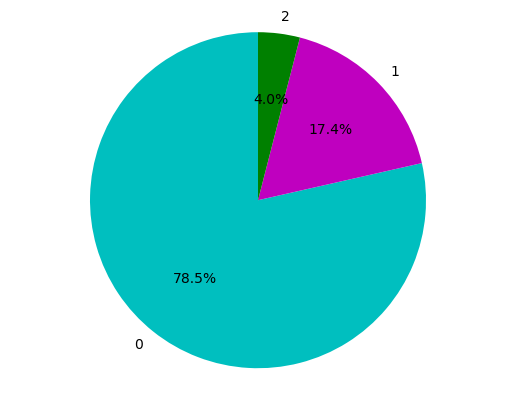

In [210]:
labels= df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe().index
colors=['c', 'm', 'g']
sizes= df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe()["count"]
LTVCluster_Pie= plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [212]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       804
           1       0.12      0.04      0.06       194
           2       0.00      0.00      0.00        38

    accuracy                           0.74      1036
   macro avg       0.30      0.33      0.30      1036
weighted avg       0.62      0.74      0.67      1036

******************************
 
Logistic Regression classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       804
           1       0.35      0.04      0.07       194
           2       0.00      0.00      0.00        38

    accuracy                           0.78      1036
   macro avg       0.38      0.34      0.31      1036
weighted avg       0.67      0.78      0.69      1036

******************************
 
Random Forest classifica